# Markovify Jupyter Notebook

Installing markovify and mounting Google Drive

In [52]:
!pip install markovify

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
!cd "/content/drive/MyDrive/Semantic_Data_Processing"

## Generating sentences with a sample text

In [55]:
import markovify

# Sample text for training the Markov chain
text = """
Markovify is a simple and powerful Markov chain text generator. A Markov chain is a stochastic model describing a sequence of possible events in which the probability of each event depends only on the state attained in the previous event. Markovify uses this concept to generate random, realistic sentences based on the patterns it recognizes in the provided text.
The library allows users to train a Markov chain based on a given corpus of text and then use that chain to generate text that is statistically similar to the training data. This makes it a useful tool for tasks such as text generation, text synthesis, and creating simple chatbots.
Markovify is often used in natural language processing applications, including generating text that resembles a given input text or creating randomized sentences based on a specific writing style. It's a popular choice for generating sentences that sound like they could have been written by a human, as it can capture the underlying structure and patterns in the training data to produce coherent and contextually appropriate output.
"""

# Build the Markov model
text_model = markovify.Text(text)

# Generate a few sentences
for i in range(5):
    print(text_model.make_sentence()) # or it is possible to use .make_short_sentence(50)


A Markov chain text generator.
The library allows users to train a Markov chain based on the patterns it recognizes in the provided text.
The library allows users to train a Markov chain based on the state attained in the training data to produce coherent and contextually appropriate output.
Markovify uses this concept to generate random, realistic sentences based on the state attained in the training data.
Markovify is often used in natural language processing applications, including generating text that is statistically similar to the training data to produce coherent and contextually appropriate output.


If the text dataset is not large, the predicted sentences are similar to each other or have value None, according to the last output.

## Using Markovify with a Job Posting Dataset

In [56]:
import spacy
import re
import markovify
import nltk
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [57]:
text = pd.read_csv("/content/drive/MyDrive/Semantic_Data_Processing/archive/job_postings.csv")
text

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1708301126000,NaN,NaN,NaN,1692749193000,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1695426553000,NaN,NaN,NaN,1692834553000,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1695321872000,NaN,NaN,NaN,1692729872000,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,1695424007000,NaN,NaN,NaN,1692832007000,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1708419602000,NaN,NaN,NaN,1692867714000,NaN,1,FULL_TIME,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",...,1695336734000,NaN,Entry level,NaN,1692744734000,aspirebakeriescareers.com,0,PART_TIME,NaN,NaN
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,1695336368000,NaN,Entry level,NaN,1692744368000,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,1695336368000,NaN,Entry level,NaN,1692744368000,recruiting.ultipro.com,0,PART_TIME,NaN,NaN
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,1695336071000,NaN,Mid-Senior level,NaN,1692744071000,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY


In [58]:
text = text["description"].astype(str)
text

0        While many industries were hurt by the last fe...
1        Are you a dynamic and creative marketing profe...
2        Join Us as a Model Risk Auditor – Showcase You...
3        Business ManagerFirst Baptist Church ForneyFor...
4        YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...
                               ...                        
15881    Location:\n\nWest Columbia, SC, US, 29172\n\n2...
15882    Job Title: Unit Secretary\nDepartment: Nursing...
15883    Job Title: Radiology Aide, Perdiem\nDepartment...
15884    Grade 105\nJob Type: Officer of Administration...
15885    Nexion Health Management affiliates operate 56...
Name: description, Length: 15886, dtype: object

In [59]:
# Showing one job posting
text[15]

"Job Description Summary \n\nAs the Virtual Sales Associate Account Manager, Women's Health, you would be responsible for maintaining the relationship with departmental and technical decision makers in their assigned accounts and where applicable. The Associate Account Manager is the clinical/technical and sales expert for their assigned products, solutions/services (mammography, bone density, and automated breast ultrasound). They are expected to be able to differentiate GE's product/solution/service offerings, convey compelling value propositions, lead the opportunity, qualify the customer needs, develop, and present solutions proposals and quotations, and respond to customers' clinical/technical/process questions to successfully close clinical/technical/solution sales.GE Healthcare is a place with big impact. We unlock opportunities for our people, our customers, and their patients, turning big ideas into realities that advance global healthcare.\n\nJob Description\n\n Essential Res

In [60]:
# join all the entries together
text_combined = " ".join(text)
# replace \n by spaces
text_combined = text_combined.replace("\n", " ")

In [61]:
# print some characters from the text dataset
text_combined[1500:3000]

"ember!? Apply today and let's connect! Job Type: Full-time Pay: $19.00 - $22.00 per hour Benefits:401(k)401(k) matchingDental insuranceHealth insurancePaid time offParental leaveVision insuranceSupplemental pay types:Bonus payCommission payWeekly day range:Monday to FridayWork setting:In-personOfficeWork Location: In person Are you a dynamic and creative marketing professional looking to make a significant impact in the world of freight and logistics? We are seeking a talented Marketing Manager to join our team and drive our marketing initiatives to new heights. If you're passionate about shaping brand narratives, developing strategic campaigns, and thrive in a fast-paced environment, we want to hear from you!Key Responsibilities:Develop and execute comprehensive marketing strategies to enhance brand visibility and promote our freight and logistics services.Lead a team of marketing specialists, fostering collaboration and guiding their efforts towards achieving set goals.Analyze marke

Plotting the frequency distribution of the most common words

In [62]:
from nltk import FreqDist, word_tokenize

nltk.download("punkt")

words = word_tokenize(text_combined)
frequency_distribution = FreqDist(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [63]:
# print the most common words
frequency_distribution.most_common(20)

[(',', 582588),
 ('and', 474315),
 ('.', 266411),
 ('to', 255365),
 ('the', 202705),
 ('of', 183339),
 ('a', 133053),
 ('in', 123892),
 ('with', 107645),
 ('for', 97687),
 (':', 68735),
 ('or', 67061),
 ('is', 62196),
 (')', 53644),
 ('(', 53323),
 ('as', 49962),
 ('our', 47669),
 ('on', 43508),
 ('are', 40618),
 ('be', 39623)]

It was expected that the most common words are the "connecting" ones. Therefore, it is necessary to remove them.

In [64]:
from nltk.corpus import stopwords

nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
# getting only the meaningful words
meaningful_words = [
  word for word in words if word.casefold() not in stop_words
]

In [66]:
frequency_distribution = FreqDist(meaningful_words)
# print the most common meaningful words
frequency_distribution.most_common(20)

[(',', 582588),
 ('.', 266411),
 (':', 68735),
 (')', 53644),
 ('(', 53323),
 ('’', 37353),
 ('work', 35995),
 ('experience', 35035),
 ('team', 27922),
 ('including', 22610),
 (';', 20580),
 ('business', 19320),
 ('skills', 18736),
 ('&', 18133),
 ('years', 16204),
 ('management', 16173),
 ('-', 15255),
 ('support', 15248),
 ('customer', 15191),
 ('position', 14698)]

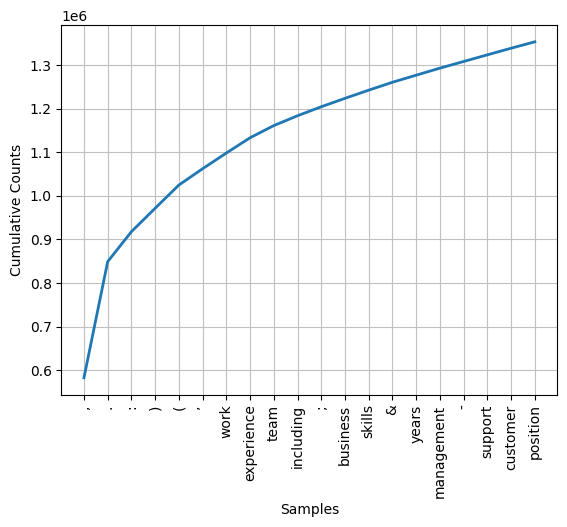

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [67]:
# plot the results
frequency_distribution.plot(20, cumulative=True)

Generating text with Markovify

In [68]:
generator_markovify = markovify.Text(text_combined)

In [69]:
for i in range(12):
    print(generator_markovify.make_sentence(),  "\n")

Company DescriptionNumotion is looking to make technologies work together and inspire them to event management.Assists with responsibilities and qualifications. 

We do not discriminate against any employee, or applicant for employment without regard to race, color, age, national origin, protected veteran status or characteristic. 

Key job responsibilities As a communications specialist to assist in operational processes effectively and professionally communicate in a moderately complex homeowner property insurance products and participate in the workplace. 

The USA Pacific-Northwest BDM will serve in a manufacturing cell of a team as an expert in the event no SROA or Surplus candidates are given below;if you are encouraged to apply. 

While GE HealthCare customers have vaccination mandates that may be entitled to a department head or manager. 

These kinds of people in moving, growing, connecting, and being there for you to join our Digital Engineering Services leverages more than 2

Let's add another text dataset with Trump tweets (until April 2020). Then, both datasets are combined for Markovify.

In [70]:
text_t = pd.read_csv("/content/drive/MyDrive/Semantic_Data_Processing/archive_t/realdonaldtrump.csv")
text_t

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN
...,...,...,...,...,...,...,...,...
43347,1273405198698975232,https://twitter.com/realDonaldTrump/status/127...,Joe Biden was a TOTAL FAILURE in Government. H...,2020-06-17 19:00:32,23402,116377,NaN,NaN
43348,1273408026968457216,https://twitter.com/realDonaldTrump/status/127...,Will be interviewed on @ seanhannity tonight a...,2020-06-17 19:11:47,11810,56659,@seanhannity,NaN
43349,1273442195161387008,https://twitter.com/realDonaldTrump/status/127...,pic.twitter.com/3lm1spbU8X,2020-06-17 21:27:33,4959,19344,NaN,NaN
43350,1273442469066276864,https://twitter.com/realDonaldTrump/status/127...,pic.twitter.com/vpCE5MadUz,2020-06-17 21:28:38,4627,17022,NaN,NaN


In [71]:
# keeping only the text from tweets
text_t = text_t["content"].astype(str)
text_t

0        Be sure to tune in and watch Donald Trump on L...
1        Donald Trump will be appearing on The View tom...
2        Donald Trump reads Top Ten Financial Tips on L...
3        New Blog Post: Celebrity Apprentice Finale and...
4        "My persona will never be that of a wallflower...
                               ...                        
43347    Joe Biden was a TOTAL FAILURE in Government. H...
43348    Will be interviewed on @ seanhannity tonight a...
43349                           pic.twitter.com/3lm1spbU8X
43350                           pic.twitter.com/vpCE5MadUz
43351                           pic.twitter.com/VLlc0BHW41
Name: content, Length: 43352, dtype: object

In [72]:
# showing one tweet
text_t[5]

'Miss USA Tara Conner will not be fired - "I\'ve always been a believer in second chances." says Donald Trump'

In [73]:
# join all the entries together
text_t_combined = " ".join(text_t)
# replace \n by spaces
text_t_combined = text_t_combined.replace("\n", " ")

In [74]:
# print some characters from the text dataset
text_t_combined[1500:3000]

'ays know you could be on the precipice of something great." --Donald J. Trump http://tinyurl.com/pqpfvm Read a great interview with Donald Trump that appeared in The New York Times Magazine: http://tinyurl.com/qsx4o6 "Keep it fast, short and direct - whatever it is." --Donald J. Trump http://tinyurl.com/pqpfvm Don\'t forget to enter the "Think Like A Champion" signed book and keychain contest: http://www.trumpthinklikeachampion.com/contest Did you know Donald Trump is on Facebook? http://www.facebook.com/DonaldTrump - Become a fan today! "Your higher self is in direct opposition to your comfort zone." --Donald J. Trump http://tinyurl.com/pqpfvm Read an excerpt from Think Like A Champion by Donald J. Trump: http://bit.ly/11FHpR "You have to know when to call it quits and when to keep moving forward." --Donald J. Trump http://www.trumpthinklikeachampion.com Check out Donald Trump\'s new iGoogle Showcase page: http://bit.ly/DdD2A “If you don\'t have problems, you\'re pretending or you do

Plotting the distribution of the most common words for Trump Tweets dataset.

In [75]:
words = word_tokenize(text_t_combined)

In [76]:
# getting only the meaningful words
meaningful_words = [
  word for word in words if word.casefold() not in stop_words
]

In [77]:
frequency_distribution = FreqDist(meaningful_words)
# print the most common meaningful words
frequency_distribution.most_common(20)

[('@', 42088),
 ('.', 38269),
 (',', 30057),
 ('!', 27581),
 (':', 21786),
 ('``', 14094),
 ("''", 11260),
 ('realDonaldTrump', 8506),
 ('#', 7795),
 ('’', 5311),
 ('Trump', 4814),
 ('&', 4792),
 ('http', 4674),
 ('?', 4197),
 ('great', 3990),
 ('…', 3712),
 ("'s", 3636),
 ('”', 3259),
 ('“', 3257),
 ('-', 3022)]

From the last output, it is necessary to filter out all characters that are not letters for a better output.

In [78]:
filtered_meaningful_words = [word for word in words if (word.isalpha()) and (word not in stop_words)]

In [79]:
frequency_distribution = FreqDist(filtered_meaningful_words)
# print the most common meaningful words
frequency_distribution.most_common(20)

[('I', 10506),
 ('realDonaldTrump', 8506),
 ('The', 4921),
 ('Trump', 4814),
 ('http', 4674),
 ('great', 3990),
 ('https', 2744),
 ('Thank', 2518),
 ('people', 2314),
 ('We', 2204),
 ('would', 1957),
 ('President', 1890),
 ('Great', 1882),
 ('Donald', 1748),
 ('Obama', 1701),
 ('Thanks', 1667),
 ('get', 1639),
 ('He', 1629),
 ('It', 1620),
 ('like', 1522)]

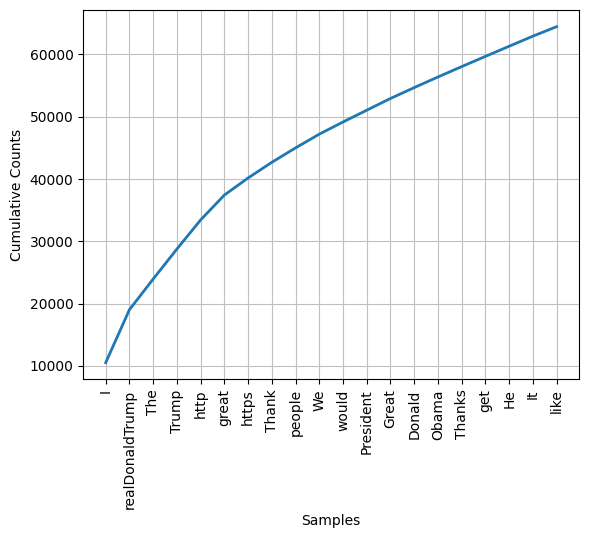

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [80]:
# plot the results
frequency_distribution.plot(20, cumulative=True)

Combining both texts together and using Markovify to generate new sentences

In [81]:
# combine two texts together
text_fin = text_combined + " " + text_t_combined

In [82]:
# use markovify to generate the sentences
generator_markovify_combined = markovify.Text(text_fin)

In [83]:
for i in range(12):
    print(generator_markovify_combined.make_sentence(),  "\n")

More information about equal employment opportunities to impact the world we care about the status quo, work hard to play in building web applications using the POLARIS system. 

Hydraulic and pneumatic systems and fortifying our infrastructure. 

I will soon be sitting for prolonged periods of time, talking and listening.Typical work is generally required to drive. 

Provides direct patient care in general if a positive work environment and is proud to call JEB a liar, but the majority of your performance, then Everyday Health Group, a global company CORE JOB RESPONSIBILITIES: Load and unload delivery vehicles to meet goals. 

Resume is required prior to performing work Exception: when unsafe or will be expected to behave in a Lab setting with direct financial responsibility, ownership, and adaptability, work to be a good understanding of Kaseya's customer requirements and identifies industry best practices, frameworks, and contribute todiscussions and meetingsBuilding & Maintaining R

To summarize, Markovify is a library that allows to generate sentences from different sources of text. One of its main advantages is that it does not require long training time. However, the quality of sentences can be low due to the algorithm, i.e., they, usually, do not have much meaning. Nevertheless, some sentences are generated in an interesting way. It is also possible to combine texts from totally different fields to see what sentences can be generated.